In [1]:
## The following code ensures that all functions and init files are reloaded before executions.
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
from insitupy import read_xenium
import scanpy as sc

In [3]:
from insitupy import differential_gene_expression

In [4]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [27]:
insitupy_project = Path("demo_dataset/demo_insitupy_project")

In [69]:
insitupy_project2 = Path("demo_dataset/demo_insitupy_project2")

In [28]:
xd = read_xenium(insitupy_project) # breast cancer dataset

In [70]:
xd2 = read_xenium(insitupy_project2) #lung_cancer dataset

In [29]:
xd.load_all()

Loading annotations...
No `annotations` modality found.
Loading cells...
	No alternative cells found...
Loading images...
Loading regions...
No `regions` modality found.
No `transcripts` modality found.


In [71]:
xd2.load_all()

Loading annotations...
No `annotations` modality found.
Loading cells...
	No alternative cells found...
Loading images...
Loading regions...
No `regions` modality found.
Loading transcripts...


Celltype annotation with decoupler

In [31]:
import decoupler as dc

/opt/anaconda3/envs/insitupy/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [45]:
import pandas as pd

file_path = '/Users/birthi/Downloads/PanglaoDB_marker.tsv'

markers = pd.read_csv(file_path, sep='\t')


In [46]:
markers

,species,official gene symbol,cell type,nicknames,ubiquitousness index,product description,gene type,canonical marker,germ layer,organ,sensitivity_human,sensitivity_mouse,specificity_human,specificity_mouse
0,Mm Hs,CTRB1,Acinar cells,CTRB,0.017,chymotrypsinogen B1,protein-coding gene,1.0,Endoderm,Pancreas,1.000000,0.957143,0.000629,0.015920
1,Mm Hs,KLK1,Acinar cells,Klk6,0.013,kallikrein 1,protein-coding gene,1.0,Endoderm,Pancreas,0.833333,0.314286,0.005031,0.012826
2,Mm Hs,RBPJL,Acinar cells,RBP-L|SUHL|RBPSUHL,0.001,recombination signal binding protein for immun...,protein-coding gene,1.0,Endoderm,Pancreas,0.000000,0.000000,0.000000,0.000000
3,Mm Hs,PTF1A,Acinar cells,PTF1-p48|bHLHa29,0.001,pancreas associated transcription factor 1a,protein-coding gene,1.0,Endoderm,Pancreas,0.000000,0.157143,0.000629,0.000773
4,Mm,TRY4,Acinar cells,NaN,0.007,trypsin 4,protein coding gene,1.0,Endoderm,Pancreas,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8281,Mm Hs,MYH11,Vascular smooth muscle cells,SMMHC|SMHC,0.015,myosin heavy chain 11,protein-coding gene,NaN,Mesoderm,Smooth muscle,0.000000,1.000000,0.016291,0.014697
8282,Mm Hs,PDGFRB,Vascular smooth muscle cells,JTK12|CD140b|PDGFR1|PDGFR,0.033,platelet derived growth factor receptor beta,protein-coding gene,NaN,Mesoderm,Smooth muscle,0.000000,0.750000,0.036341,0.033246
8283,Mm Hs,SEMA3D,Vascular smooth muscle cells,coll-2|Sema-Z2,0.005,semaphorin 3D,protein-coding gene,NaN,Mesoderm,Smooth muscle,0.000000,0.000000,0.001253,0.000000
8284,Mm Hs,TBX18,Vascular smooth muscle cells,NaN,0.004,T-box 18,protein-coding gene,NaN,Mesoderm,Smooth muscle,0.000000,0.000000,0.000313,0.000000


In [56]:
# Filter by canonical_marker and human
markers = markers[
    (markers['species'].isin(['Mm Hs', 'Hs'])) &  # Filter für die Spezies
    (markers['canonical marker'] == 1.0) &       # Filter für den Marker
    (markers['sensitivity_human'] > 0.5)         # Filter für die Sensitivität
]

# Remove duplicated entries
markers = markers[~markers.duplicated(['cell type', 'official gene symbol'])]
markers

,species,official gene symbol,cell type,nicknames,ubiquitousness index,product description,gene type,canonical marker,germ layer,organ,sensitivity_human,sensitivity_mouse,specificity_human,specificity_mouse
0,Mm Hs,CTRB1,Acinar cells,CTRB,0.017,chymotrypsinogen B1,protein-coding gene,1.0,Endoderm,Pancreas,1.000000,0.957143,0.000629,0.015920
1,Mm Hs,KLK1,Acinar cells,Klk6,0.013,kallikrein 1,protein-coding gene,1.0,Endoderm,Pancreas,0.833333,0.314286,0.005031,0.012826
5,Mm Hs,CELA3A,Acinar cells,ELA3|ELA3A,0.001,chymotrypsin like elastase family member 3A,protein-coding gene,1.0,Endoderm,Pancreas,0.833333,0.128571,0.000000,0.000000
6,Mm Hs,PRSS1,Acinar cells,TRY1,0.002,serine protease 1,protein-coding gene,1.0,Endoderm,Pancreas,1.000000,0.028571,0.005975,0.000000
8,Mm Hs,SPINK1,Acinar cells,Spink3|PCTT|PSTI|TATI,0.029,"serine peptidase inhibitor, Kazal type 1",protein-coding gene,1.0,Endoderm,Pancreas,1.000000,0.000000,0.035220,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7853,Mm Hs,JUNB,T cells,NaN,0.387,"JunB proto-oncogene, AP-1 transcription factor...",protein-coding gene,1.0,Mesoderm,Immune system,0.675889,0.691589,0.515822,0.356450
7856,Mm Hs,CD52,T cells,HE5|EDDM5|CDW52,0.181,CD52 molecule,protein-coding gene,1.0,Mesoderm,Immune system,0.916996,0.700935,0.222865,0.152300
7868,Mm Hs,GZMB,T cytotoxic cells,CCPI|CGL-1|CSP-B|CGL1|CTSGL1|SECT|CSPB,0.017,granzyme B,protein-coding gene,1.0,Mesoderm,Immune system,1.000000,0.000000,0.059875,0.008341
7869,Mm Hs,TRAC,T cytotoxic cells,NaN,0.042,T cell receptor alpha constant,other,1.0,Mesoderm,Immune system,1.000000,0.000000,0.131348,0.000000


In [57]:
dc.run_ora(
    mat=xd.cells.matrix,
    net=markers,
    source='cell type',
    target='official gene symbol',
    min_n=3,
    verbose=True,
    use_raw=False
)

Running ora on mat with 163565 samples and 313 targets for 20 sources.


100%|██████████| 163565/163565 [00:31<00:00, 5182.18it/s]


In [72]:
dc.run_ora(
    mat=xd2.cells.matrix,
    net=markers,
    source='cell type',
    target='official gene symbol',
    min_n=3,
    verbose=True,
    use_raw=False
)

Running ora on mat with 151782 samples and 377 targets for 19 sources.


100%|██████████| 151782/151782 [00:29<00:00, 5165.80it/s]


In [58]:
xd.cells.matrix.obsm['ora_estimate']

source,B cells,B cells naive,Cholangiocytes,Dendritic cells,Ductal cells,Endothelial cells,Fibroblasts,Gamma delta T cells,Keratinocytes,Luminal epithelial cells,Macrophages,Mammary epithelial cells,Mast cells,Mesangial cells,NK cells,Neutrophils,Plasma cells,Plasmacytoid dendritic cells,Smooth muscle cells,T cells
1,-0.0,-0.00000,-0.000000,-0.000000,5.744909,-0.000000,-0.000000,-0.0,-0.000000,5.046547,-0.000000,5.744909,-0.000000,-0.000000,-0.0,2.398592,-0.0,-0.0,-0.000000,-0.0
2,-0.0,-0.00000,-0.000000,-0.000000,5.744909,-0.000000,-0.000000,-0.0,2.398592,5.046547,-0.000000,5.744909,-0.000000,-0.000000,-0.0,-0.000000,-0.0,-0.0,-0.000000,-0.0
5,-0.0,2.19496,2.495339,2.620115,5.744909,-0.000000,2.620115,-0.0,2.398592,5.046547,2.252789,2.620115,-0.000000,-0.000000,-0.0,-0.000000,-0.0,-0.0,-0.000000,-0.0
8,-0.0,-0.00000,-0.000000,-0.000000,2.620115,-0.000000,2.620115,-0.0,-0.000000,2.319573,-0.000000,5.744909,-0.000000,-0.000000,-0.0,-0.000000,-0.0,-0.0,2.495339,-0.0
9,-0.0,-0.00000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.0,-0.000000,5.046547,-0.000000,2.620115,2.620115,-0.000000,-0.0,2.398592,-0.0,-0.0,-0.000000,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167776,-0.0,-0.00000,-0.000000,-0.000000,2.620115,2.252789,-0.000000,-0.0,-0.000000,5.046547,-0.000000,5.744909,-0.000000,2.495339,-0.0,-0.000000,-0.0,-0.0,-0.000000,-0.0
167777,-0.0,-0.00000,-0.000000,-0.000000,2.620115,2.252789,-0.000000,-0.0,-0.000000,5.046547,-0.000000,2.620115,-0.000000,2.495339,-0.0,-0.000000,-0.0,-0.0,-0.000000,-0.0
167778,-0.0,-0.00000,2.495339,-0.000000,5.744909,2.252789,-0.000000,-0.0,2.398592,5.046547,-0.000000,5.744909,-0.000000,2.495339,-0.0,-0.000000,-0.0,-0.0,-0.000000,-0.0
167779,-0.0,-0.00000,-0.000000,-0.000000,2.620115,-0.000000,-0.000000,-0.0,2.398592,2.319573,-0.000000,5.744909,-0.000000,2.495339,-0.0,-0.000000,-0.0,-0.0,-0.000000,-0.0


In [73]:
xd2.cells.matrix.obsm['ora_estimate']

source,Alpha cells,B cells naive,Beta cells,Endothelial cells,Enterocytes,Enteroendocrine cells,Erythroid-like and erythroid precursor cells,Gamma (PP) cells,Gamma delta T cells,Macrophages,Mast cells,Mesangial cells,NK cells,Plasma cells,Plasmacytoid dendritic cells,Platelets,Pulmonary alveolar type II cells,Smooth muscle cells,T cells
aaaaficg-1,-0.000000,2.245102,-0.000000,2.069597,2.324088,-0.0,-0.0,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,2.420803,-0.000000,-0.000000,2.545546,2.245102,4.892906
aaabbaka-1,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.0,-0.0,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,2.545546,2.245102,-0.000000
aaabbjoo-1,2.178351,-0.000000,2.420803,-0.000000,-0.000000,-0.0,-0.0,2.420803,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
aaablchg-1,2.178351,-0.000000,2.420803,-0.000000,-0.000000,-0.0,-0.0,2.420803,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
aaacaicl-1,2.178351,-0.000000,2.420803,2.069597,2.324088,-0.0,-0.0,2.420803,-0.000000,-0.000000,-0.000000,2.420803,-0.000000,-0.000000,-0.000000,2.545546,2.545546,2.245102,-0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
oipoefmm-1,-0.000000,4.892906,-0.000000,2.069597,-0.000000,-0.0,-0.0,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,2.420803,-0.000000,-0.000000,-0.000000,4.892906,-0.000000
oipogjpd-1,-0.000000,2.245102,-0.000000,2.069597,-0.000000,-0.0,-0.0,-0.000000,4.513433,-0.000000,5.290353,-0.000000,4.513433,-0.000000,4.622331,-0.000000,-0.000000,4.892906,-0.000000
oipolbma-1,2.178351,2.245102,2.420803,2.069597,-0.000000,-0.0,-0.0,2.420803,-0.000000,4.892906,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,2.245102
oippajff-1,2.178351,2.245102,2.420803,2.069597,-0.000000,-0.0,-0.0,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,2.069597,-0.000000,2.120554,-0.000000,-0.000000,-0.000000,4.892906


In [59]:
import numpy as np

In [60]:
acts = dc.get_acts(xd.cells.matrix, obsm_key='ora_estimate')

# We need to remove inf and set them to the maximum value observed for pvals=0
acts_v = acts.X.ravel()
max_e = np.nanmax(acts_v[np.isfinite(acts_v)])
acts.X[~np.isfinite(acts.X)] = max_e

acts

AnnData object with n_obs × n_vars = 163565 × 20
    obs: 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'n_genes', 'leiden'
    uns: 'leiden', 'leiden_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial', 'ora_estimate', 'ora_pvals'

In [75]:
acts2 = dc.get_acts(xd2.cells.matrix, obsm_key='ora_estimate')

# We need to remove inf and set them to the maximum value observed for pvals=0
acts2_v = acts2.X.ravel()
max_e = np.nanmax(acts2_v[np.isfinite(acts2_v)])
acts2.X[~np.isfinite(acts2.X)] = max_e

acts2

AnnData object with n_obs × n_vars = 151782 × 19
    obs: 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'n_genes', 'leiden'
    uns: 'leiden', 'leiden_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial', 'ora_estimate', 'ora_pvals'

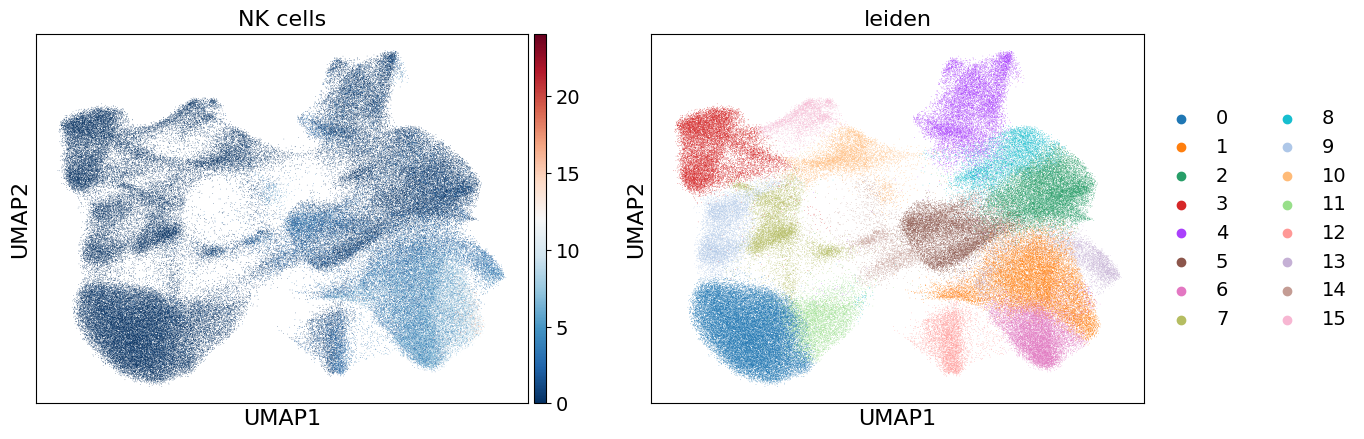

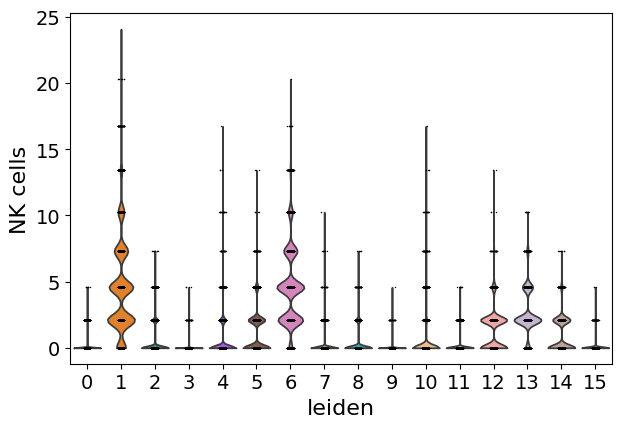

In [61]:
sc.pl.umap(acts, color=['NK cells', 'leiden'], cmap='RdBu_r')
sc.pl.violin(acts, keys=['NK cells'], groupby='leiden')

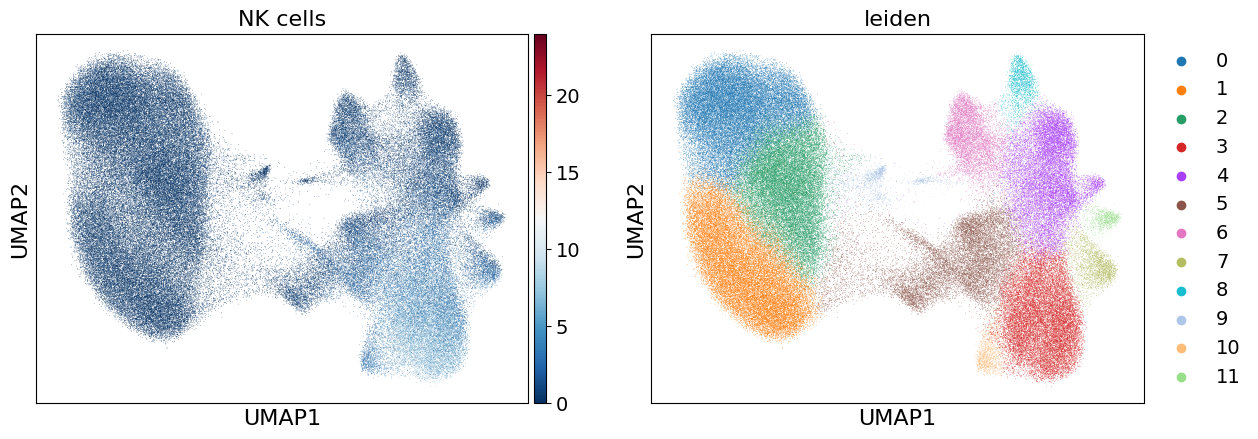

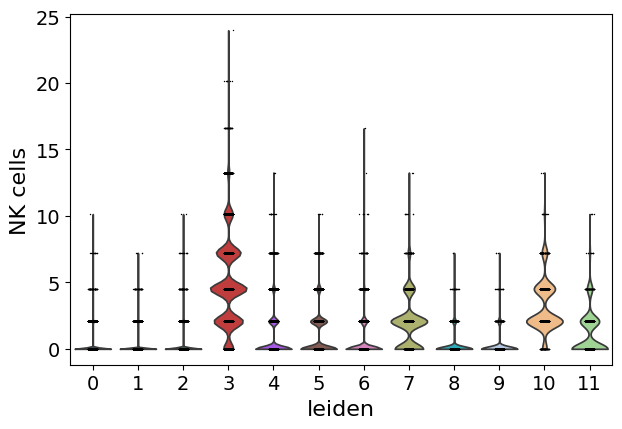

In [76]:
sc.pl.umap(acts2, color=['NK cells', 'leiden'], cmap='RdBu_r')
sc.pl.violin(acts2, keys=['NK cells'], groupby='leiden')

In [62]:
df = dc.rank_sources_groups(acts, groupby='leiden', reference='rest', method='t-test_overestim_var')
df

,group,reference,names,statistic,meanchange,pvals,pvals_adj
0,0,rest,Cholangiocytes,199.003576,1.824397,0.0,0.0
1,0,rest,Mammary epithelial cells,175.418461,2.907357,0.0,0.0
2,0,rest,Luminal epithelial cells,140.764037,2.526017,0.0,0.0
3,0,rest,Ductal cells,126.965061,2.145393,0.0,0.0
4,0,rest,Mesangial cells,101.620343,0.974141,0.0,0.0
...,...,...,...,...,...,...,...
315,9,rest,NK cells,-41.513636,-1.165339,0.0,0.0
316,9,rest,T cells,-42.153630,-1.801460,0.0,0.0
317,9,rest,B cells,-43.843268,-0.655453,0.0,0.0
318,9,rest,Plasmacytoid dendritic cells,-45.349463,-0.992769,0.0,0.0


In [77]:
df2 = dc.rank_sources_groups(acts2, groupby='leiden', reference='rest', method='t-test_overestim_var')
df2

,group,reference,names,statistic,meanchange,pvals,pvals_adj
0,0,rest,Pulmonary alveolar type II cells,37.051597,0.375718,5.015346e-297,9.529157e-297
1,0,rest,Gamma (PP) cells,20.712230,0.139404,5.977316e-95,8.112072e-95
2,0,rest,Alpha cells,6.675203,0.043510,2.490387e-11,3.154490e-11
3,0,rest,Beta cells,5.901662,0.039924,3.617898e-09,4.296254e-09
4,0,rest,Mast cells,2.042788,0.016757,4.107809e-02,4.336020e-02
...,...,...,...,...,...,...,...
223,9,rest,Gamma delta T cells,-8.292218,-0.285581,1.775087e-16,6.745332e-16
224,9,rest,Macrophages,-10.417011,-0.479793,6.684455e-25,3.175116e-24
225,9,rest,Enterocytes,-11.255766,-0.317306,9.506644e-29,6.020874e-28
226,9,rest,NK cells,-13.238367,-0.706240,1.544301e-38,1.467086e-37


In [63]:
n_ctypes = 3
ctypes_dict = df.groupby('group').head(n_ctypes).groupby('group')['names'].apply(lambda x: list(x)).to_dict()
ctypes_dict

{'0': ['Cholangiocytes',
  'Mammary epithelial cells',
  'Luminal epithelial cells'],
 '1': ['T cells', 'NK cells', 'B cells'],
 '10': ['Smooth muscle cells', 'Keratinocytes', 'Ductal cells'],
 '11': ['Mammary epithelial cells',
  'Cholangiocytes',
  'Luminal epithelial cells'],
 '12': ['Plasmacytoid dendritic cells', 'Plasma cells', 'B cells'],
 '13': ['B cells naive', 'B cells', 'Plasmacytoid dendritic cells'],
 '14': ['Macrophages', 'Neutrophils', 'Dendritic cells'],
 '15': ['Ductal cells', 'Keratinocytes', 'Mammary epithelial cells'],
 '2': ['Fibroblasts', 'Mast cells', 'Neutrophils'],
 '3': ['Ductal cells', 'Mammary epithelial cells', 'Luminal epithelial cells'],
 '4': ['Endothelial cells', 'Smooth muscle cells', 'Fibroblasts'],
 '5': ['Neutrophils', 'Macrophages', 'Dendritic cells'],
 '6': ['T cells', 'B cells', 'NK cells'],
 '7': ['Ductal cells', 'Mammary epithelial cells', 'Luminal epithelial cells'],
 '8': ['Fibroblasts', 'Smooth muscle cells', 'Mesangial cells'],
 '9': ['Duct

In [78]:
n_ctypes = 3
ctypes_dict2 = df2.groupby('group').head(n_ctypes).groupby('group')['names'].apply(lambda x: list(x)).to_dict()
ctypes_dict2

{'0': ['Pulmonary alveolar type II cells', 'Gamma (PP) cells', 'Alpha cells'],
 '1': ['Enterocytes', 'Mesangial cells', 'Gamma (PP) cells'],
 '10': ['B cells naive', 'Plasmacytoid dendritic cells', 'Plasma cells'],
 '11': ['Mast cells', 'B cells naive', 'NK cells'],
 '2': ['Beta cells', 'Alpha cells', 'Pulmonary alveolar type II cells'],
 '3': ['T cells', 'NK cells', 'Gamma delta T cells'],
 '4': ['Smooth muscle cells',
  'Mesangial cells',
  'Plasmacytoid dendritic cells'],
 '5': ['Macrophages', 'Plasmacytoid dendritic cells', 'Enterocytes'],
 '6': ['Endothelial cells', 'Platelets', 'Smooth muscle cells'],
 '7': ['Plasma cells', 'Plasmacytoid dendritic cells', 'NK cells'],
 '8': ['Smooth muscle cells', 'Mesangial cells', 'Endothelial cells'],
 '9': ['Erythroid-like and erythroid precursor cells',
  'Enteroendocrine cells',
  'Pulmonary alveolar type II cells']}

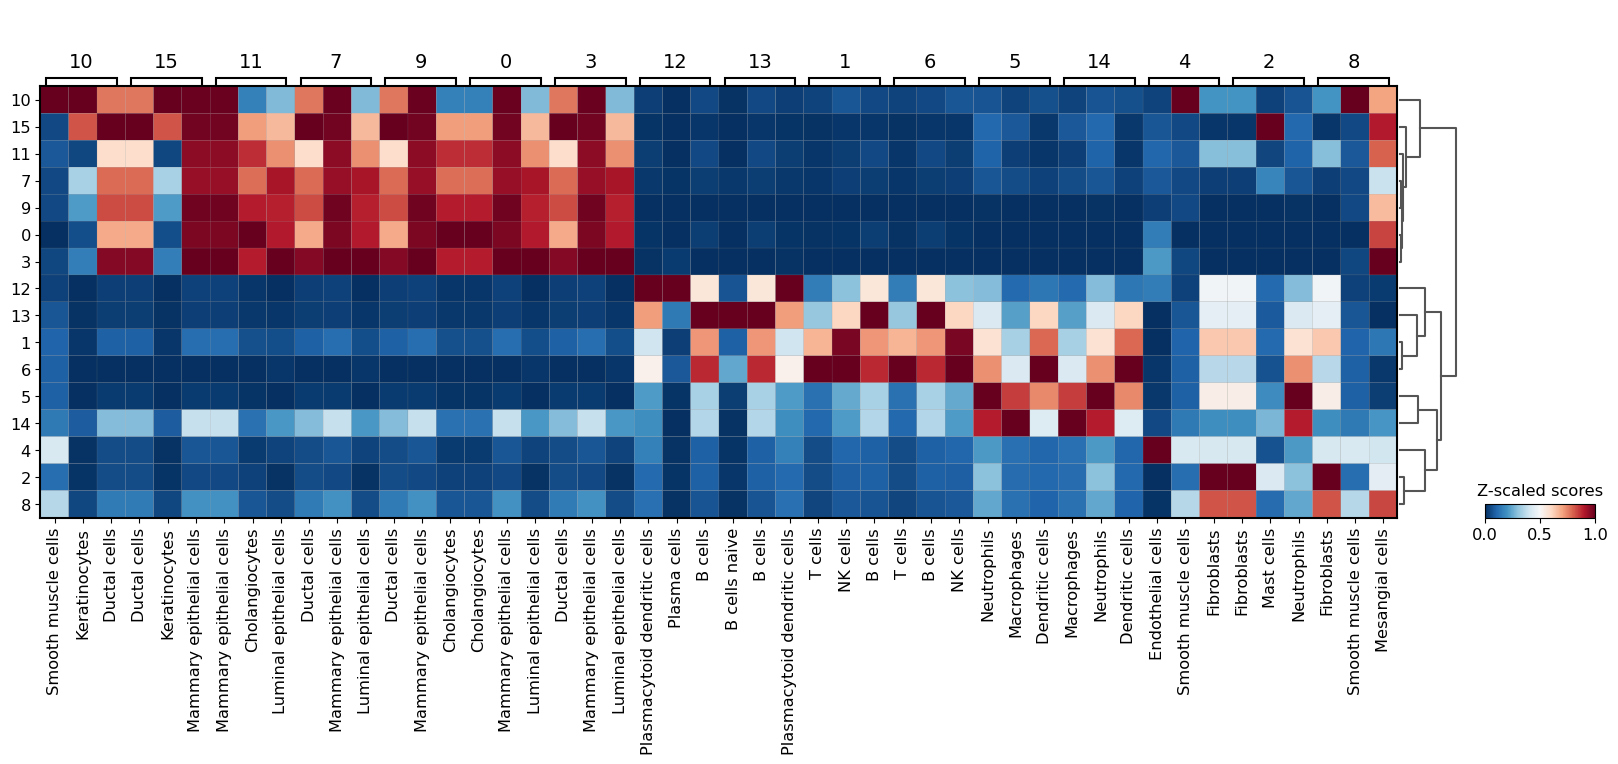

In [64]:
sc.pl.matrixplot(acts, ctypes_dict, 'leiden', dendrogram=True, standard_scale='var',
                 colorbar_title='Z-scaled scores', cmap='RdBu_r')

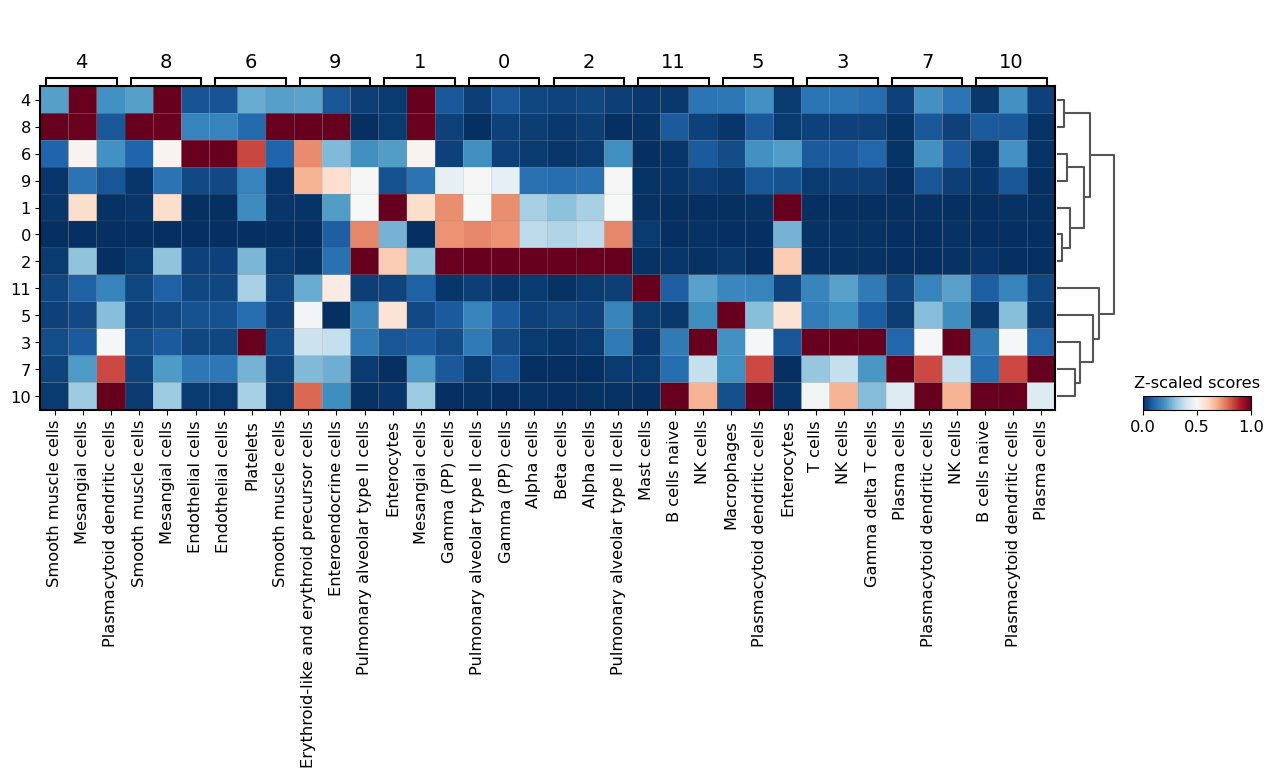

In [80]:
sc.pl.matrixplot(acts2, ctypes_dict2, 'leiden', dendrogram=True, standard_scale='var',
                 colorbar_title='Z-scaled scores', cmap='RdBu_r')

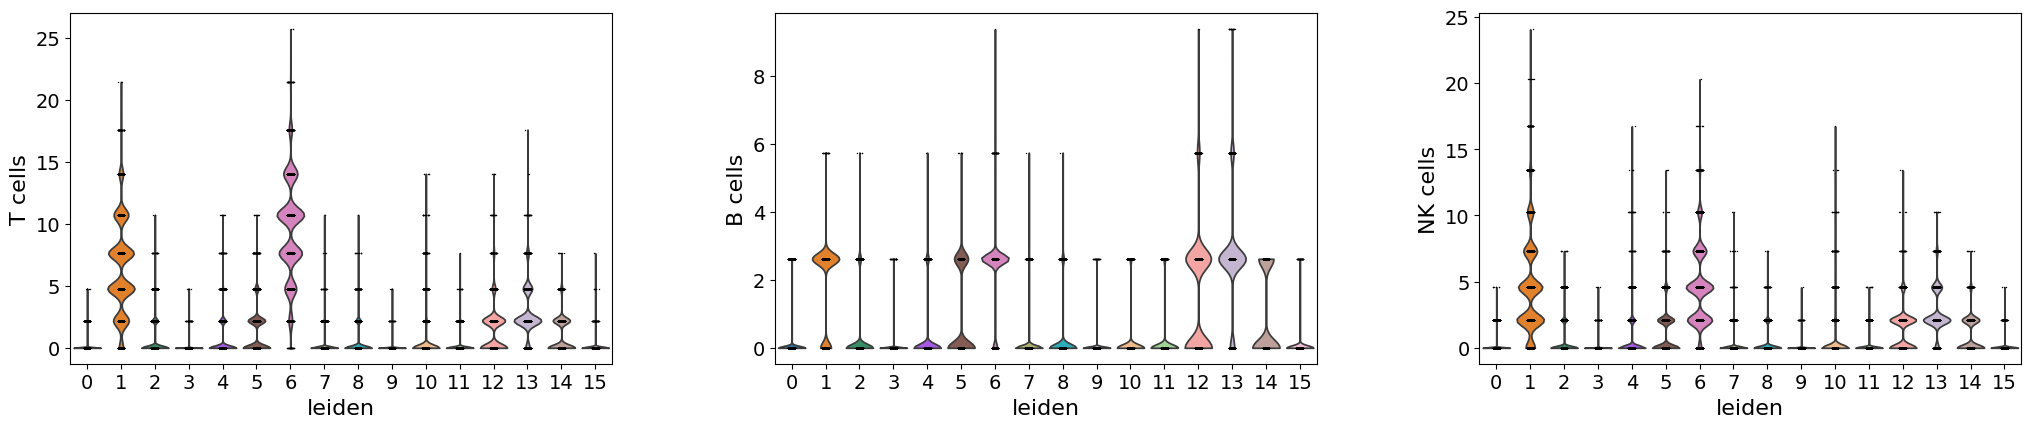

In [66]:
sc.pl.violin(acts, keys=['T cells', 'B cells', 'NK cells'], groupby='leiden')

In [67]:
annotation_dict = df.groupby('group').head(1).set_index('group')['names'].to_dict()
annotation_dict

{'0': 'Cholangiocytes',
 '1': 'T cells',
 '10': 'Smooth muscle cells',
 '11': 'Mammary epithelial cells',
 '12': 'Plasmacytoid dendritic cells',
 '13': 'B cells naive',
 '14': 'Macrophages',
 '15': 'Ductal cells',
 '2': 'Fibroblasts',
 '3': 'Ductal cells',
 '4': 'Endothelial cells',
 '5': 'Neutrophils',
 '6': 'T cells',
 '7': 'Ductal cells',
 '8': 'Fibroblasts',
 '9': 'Ductal cells'}

In [81]:
annotation_dict2 = df2.groupby('group').head(1).set_index('group')['names'].to_dict()
annotation_dict2

{'0': 'Pulmonary alveolar type II cells',
 '1': 'Enterocytes',
 '10': 'B cells naive',
 '11': 'Mast cells',
 '2': 'Beta cells',
 '3': 'T cells',
 '4': 'Smooth muscle cells',
 '5': 'Macrophages',
 '6': 'Endothelial cells',
 '7': 'Plasma cells',
 '8': 'Smooth muscle cells',
 '9': 'Erythroid-like and erythroid precursor cells'}

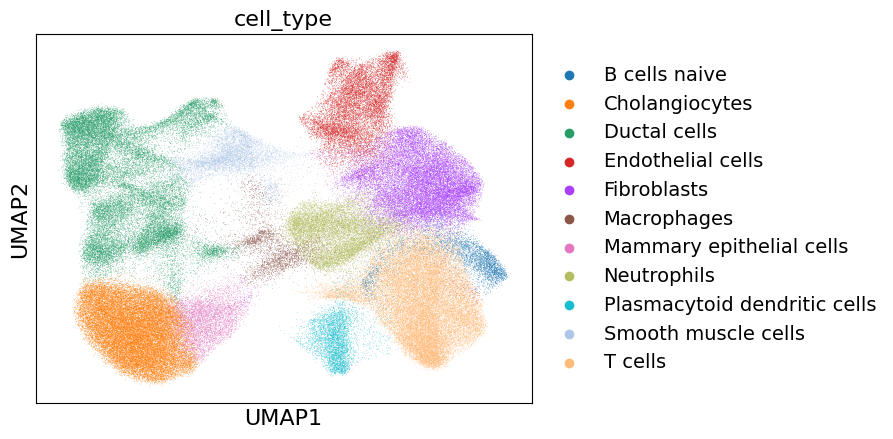

In [68]:
xd.cells.matrix.obs['cell_type'] = [annotation_dict[clust] for clust in xd.cells.matrix.obs['leiden']]
sc.pl.umap(xd.cells.matrix, color='cell_type')

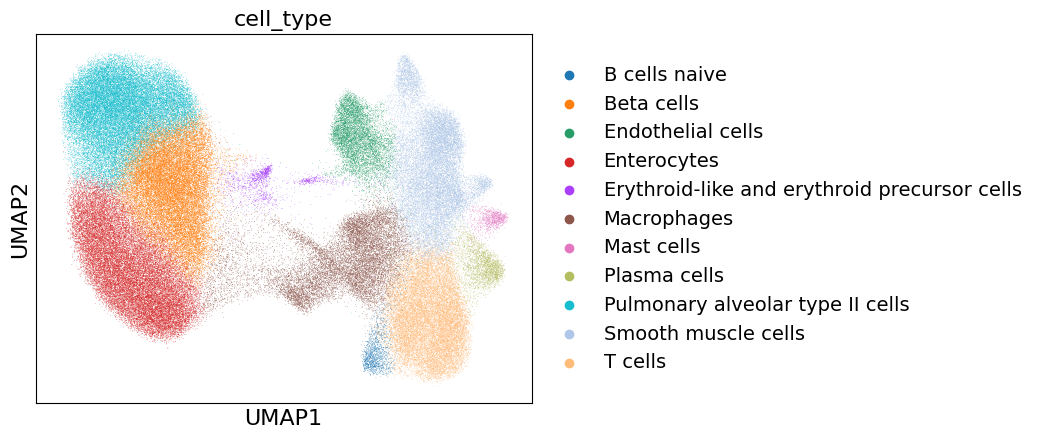

In [82]:
xd2.cells.matrix.obs['cell_type'] = [annotation_dict2[clust] for clust in xd2.cells.matrix.obs['leiden']]
sc.pl.umap(xd2.cells.matrix, color='cell_type')

Comparing of differentiell gene expression of two clusters...

In [89]:
xd.save()

Updating project in /Users/birthi/Downloads/InSituPy/notebooks/demo_dataset/demo_insitupy_project
	Updating cells...
Saved.
Reloading following modalities: cells,images
Loading cells...
	No alternative cells found...
Loading images...
`ImageData` object contains already an image with name 'nuclei'. Image is not added.
`ImageData` object contains already an image with name 'CD20'. Image is not added.
`ImageData` object contains already an image with name 'HER2'. Image is not added.
`ImageData` object contains already an image with name 'DAPI'. Image is not added.
`ImageData` object contains already an image with name 'HE'. Image is not added.


In [90]:
xd2.save()

Updating project in /Users/birthi/Downloads/InSituPy/notebooks/demo_dataset/demo_insitupy_project2
	Updating cells...
Saved.
Reloading following modalities: cells,images,transcripts
Loading cells...
	No alternative cells found...
Loading images...
`ImageData` object contains already an image with name 'nuclei'. Image is not added.
`ImageData` object contains already an image with name 'cellseg1'. Image is not added.
`ImageData` object contains already an image with name 'cellseg2'. Image is not added.
`ImageData` object contains already an image with name 'cellseg3'. Image is not added.
Loading transcripts...


In [5]:
insitupy_project = Path("demo_dataset/demo_insitupy_project")
insitupy_project2 = Path("demo_dataset/demo_insitupy_project2")

In [6]:
xd= read_xenium(insitupy_project) 
xd2 = read_xenium(insitupy_project2) 

In [7]:
xd.load_all()
xd2.load_all()

Loading annotations...
No `annotations` modality found.
Loading cells...
	No alternative cells found...
Loading images...
Loading regions...
No `regions` modality found.
No `transcripts` modality found.
Loading annotations...
No `annotations` modality found.
Loading cells...
	No alternative cells found...
Loading images...
Loading regions...
No `regions` modality found.
Loading transcripts...


In [8]:
xd2.cells.matrix

AnnData object with n_obs × n_vars = 151782 × 377
    obs: 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'n_genes', 'leiden', 'cell_type'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'cell_type_colors', 'dendrogram_leiden', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap', 'ora_estimate', 'ora_pvals', 'spatial'
    varm: 'PCs', 'binned_expression'
    layers: 'counts', 'norm_counts'
    obsp: 'connectivities', 'distances'

Calculate differentially expressed genes with Scanpy's `rank_genes_groups` using 't-test'.


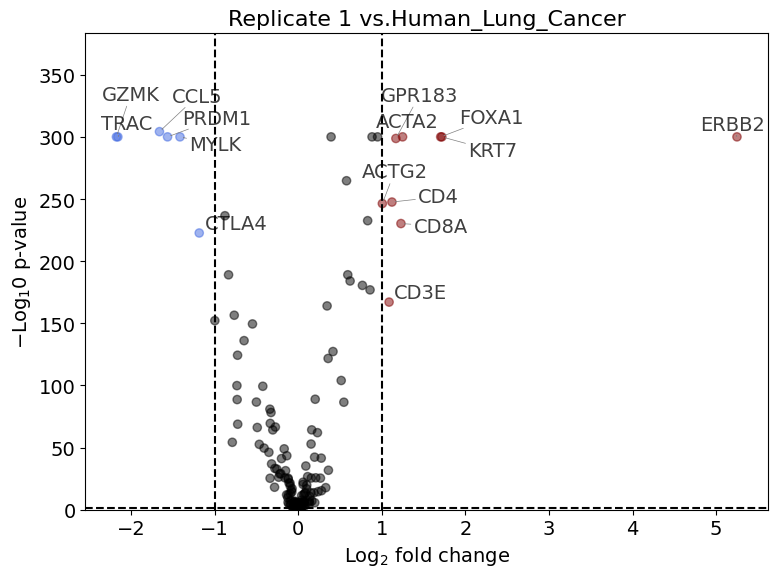

In [19]:
differential_gene_expression(
    data=xd,
    data_annotation_tuple=None,
    ref_data=xd2,
    ref_annotation_tuple=None,
    obs_tuple=('cell_type','T cells'),
    region_tuple=None)

In [18]:
xd.sample_id

'Replicate 1'